In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Input, Flatten, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/trip_advisor_data.csv')
data.head()

,overall,cleanliness,location,rooms,service,value,title,text,username,num_cities,num_helpful_votes,num_reviews,num_type_reviews,id,date_stayed,offering_id,date,via_mobile,user_id
0,4.0,5.0,5.0,5.0,4.0,3.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,JamesE339,34.0,0,104.0,49.0,147612823,December 2012,1762573,"December 17, 2012",False,BA524A238B1171206691A6CC3F28F266
1,4.0,5.0,5.0,5.0,4.0,5.0,“Stunningly Wonderful!”,Other hotels in NYC that are space challenged ...,romadaro,70.0,5,103.0,85.0,147531970,December 2012,1762573,"December 16, 2012",False,C81AB7D49D98FA410EA191E15F427BEC
2,5.0,5.0,4.0,5.0,5.0,3.0,“Unexpectedly good”,"Campus hotels are a little unpredictable, but ...",Grotshops,35.0,0,96.0,51.0,140624089,September 2012,108038,"September 18, 2012",False,4C8EFD12CA2F03E9D85709814BB16501
3,4.0,4.0,3.0,4.0,4.0,4.0,"“Pleasant enough, but a bit overrated”",For our most recent ever-so-brief New York vis...,pillowsofwanderlust,20.0,2,57.0,49.0,145940048,November 2012,1776857,"November 22, 2012",False,3F88F8D4F220EFE6418ED0B22AAF03E6
4,4.0,4.0,4.0,5.0,4.0,4.0,“nice suprise”,Booked this hotel thinking it was another Hilt...,beatricepugzilla,28.0,2,41.0,36.0,127060765,March 2012,108038,"April 1, 2012",False,A90E45A9CAD3E818327172C16C27BFB1


In [ ]:
data.describe()

,overall,cleanliness,rooms,service,value,num_cities,num_helpful_votes,num_reviews,num_type_reviews,id,offering_id
count,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,7682.000000,10050.000000,9993.000000,6444.000000,1.005000e+04,1.005000e+04
mean,4.038706,4.294726,4.012736,4.165473,3.949751,12.655038,1.019801,17.448714,14.027933,9.109240e+07,3.099200e+05
std,1.104904,1.010100,1.101676,1.128248,1.145136,14.029587,2.313198,26.746115,16.229405,4.854196e+07,4.394021e+05
min,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,3.000000,6.978530e+05,7.257200e+04
25%,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,0.000000,2.000000,5.000000,4.819406e+07,8.759000e+04
50%,4.000000,5.000000,4.000000,5.000000,4.000000,8.000000,0.000000,8.000000,9.000000,1.184954e+08,1.095195e+05
75%,5.000000,5.000000,5.000000,5.000000,5.000000,16.000000,1.000000,22.000000,17.000000,1.318665e+08,2.496960e+05
max,5.000000,5.000000,5.000000,5.000000,5.000000,202.000000,63.000000,472.000000,259.000000,1.477548e+08,3.236579e+06


In [ ]:
data = data[data.location.isin(['0.0','1.0','2.0','3.0','4.0','5.0'])]

In [ ]:
data.location.values

array(['5.0', '5.0', '4.0', ..., '3.0', '5.0', '4.0'], dtype=object)

In [ ]:
cls = ['cleanliness','location','rooms','service','value']
for cl in cls:
  data[cl] = np.asarray(data[cl]).astype(np.float64)

for cl in cls:
  print(cls,data[data[cl]==1.0].shape,data[data[cl]==2.0].shape,data[data[cl]==3.0].shape,data[data[cl]==4.0].shape,data[data[cl]==5.0].shape)

['cleanliness', 'location', 'rooms', 'service', 'value'] (307, 19) (349, 19) (991, 19) (2497, 19) (5524, 19)
['cleanliness', 'location', 'rooms', 'service', 'value'] (137, 19) (251, 19) (934, 19) (2360, 19) (5986, 19)
['cleanliness', 'location', 'rooms', 'service', 'value'] (413, 19) (579, 19) (1556, 19) (2978, 19) (4142, 19)
['cleanliness', 'location', 'rooms', 'service', 'value'] (486, 19) (446, 19) (1160, 19) (2341, 19) (5235, 19)
['cleanliness', 'location', 'rooms', 'service', 'value'] (522, 19) (610, 19) (1586, 19) (3009, 19) (3941, 19)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data['location'].unique()

array([5., 4., 3., 1., 2.])

In [ ]:
ord_enc = OrdinalEncoder()
data['offering_id'] =ord_enc.fit_transform(data['offering_id'].values.reshape(-1, 1)).reshape(1,-1)[0]
data['user_id'] =ord_enc.fit_transform(data['user_id'].values.reshape(-1, 1)).reshape(1,-1)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data.head()

,overall,cleanliness,location,rooms,service,value,title,text,username,num_cities,num_helpful_votes,num_reviews,num_type_reviews,id,date_stayed,offering_id,date,via_mobile,user_id
0,4.0,5.0,5.0,5.0,4.0,3.0,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,JamesE339,34.0,0,104.0,49.0,147612823,December 2012,1927.0,"December 17, 2012",False,626.0
1,4.0,5.0,5.0,5.0,4.0,5.0,“Stunningly Wonderful!”,Other hotels in NYC that are space challenged ...,romadaro,70.0,5,103.0,85.0,147531970,December 2012,1927.0,"December 16, 2012",False,677.0
2,5.0,5.0,4.0,5.0,5.0,3.0,“Unexpectedly good”,"Campus hotels are a little unpredictable, but ...",Grotshops,35.0,0,96.0,51.0,140624089,September 2012,849.0,"September 18, 2012",False,271.0
3,4.0,4.0,3.0,4.0,4.0,4.0,"“Pleasant enough, but a bit overrated”",For our most recent ever-so-brief New York vis...,pillowsofwanderlust,20.0,2,57.0,49.0,145940048,November 2012,1929.0,"November 22, 2012",False,224.0
4,4.0,4.0,4.0,5.0,4.0,4.0,“nice suprise”,Booked this hotel thinking it was another Hilt...,beatricepugzilla,28.0,2,41.0,36.0,127060765,March 2012,849.0,"April 1, 2012",False,583.0


In [ ]:
data.shape

(9668, 19)

In [ ]:
nb_users = len(data.user_id.unique())
nb_hotels = len(data.offering_id.unique())
nb_users, nb_hotels

(868, 1985)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data,test_size=0.2,random_state=123)

In [ ]:
user_input = Input(shape=(1,), name = 'user_input')
embed_user = Embedding(input_dim=nb_users, output_dim=64, input_length=1)(user_input)
embed_user = Flatten()(embed_user)


hotel_input = Input(shape=(1,), name = 'item_input')
embed_hotel = Embedding(input_dim=nb_hotels, output_dim=64, input_length=1)(hotel_input)
embed_hotel = Flatten()(embed_hotel)

layers0 = concatenate([embed_user,embed_hotel])
hidden1 = Dense(8,activation='relu')(layers0)
out = Dense(5)(hidden1)

In [ ]:
model = Model(inputs=[user_input, hotel_input], 
                  outputs=out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 item_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 64)        55552       ['user_input[0][0]']             
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 64)        127040      ['item_input[0][0]']             
                                                                                            

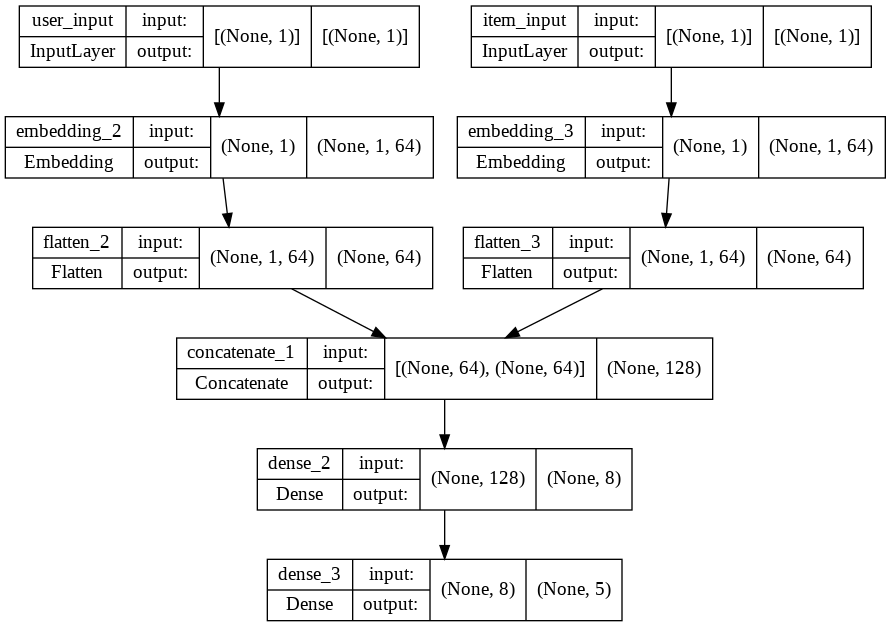

In [ ]:
tf.keras.utils.plot_model(model, to_file='img.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='mae',metrics=['mae'])

In [ ]:
y = train_data[['cleanliness','location','rooms','service','value']].values
y_test = test_data[['cleanliness','location','rooms','service','value']].values
model.fit([train_data.user_id.values,train_data.offering_id.values],y,
          
          epochs=20,batch_size=128)

Epoch 1/20
61/61 [==============================] - 7s 9ms/step - loss: 4.0913 - mae: 4.0913
Epoch 2/20
61/61 [==============================] - 1s 9ms/step - loss: 3.4923 - mae: 3.4923
Epoch 3/20
61/61 [==============================] - 1s 9ms/step - loss: 2.1559 - mae: 2.1559
Epoch 4/20
61/61 [==============================] - 1s 10ms/step - loss: 1.2401 - mae: 1.2401
Epoch 5/20
61/61 [==============================] - 1s 9ms/step - loss: 0.7992 - mae: 0.7992
Epoch 6/20
61/61 [==============================] - 1s 9ms/step - loss: 0.7050 - mae: 0.7050
Epoch 7/20
61/61 [==============================] - 1s 10ms/step - loss: 0.6803 - mae: 0.6803
Epoch 8/20
61/61 [==============================] - 1s 9ms/step - loss: 0.6679 - mae: 0.6679
Epoch 9/20
61/61 [==============================] - 1s 8ms/step - loss: 0.6599 - mae: 0.6599
Epoch 10/20
61/61 [==============================] - 1s 8ms/step - loss: 0.6525 - mae: 0.6525
Epoch 11/20
61/61 [==============================] - 1s 9ms/step - 

In [ ]:
pred = model.predict([test_data.user_id.values,test_data.offering_id.values])

In [ ]:
pred

array([[5.0040107, 5.1509347, 4.9034505, 4.9426484, 4.8811526],
       [5.1187167, 5.2561483, 5.062587 , 4.9994555, 5.047783 ],
       [3.8458726, 4.0662823, 3.7167168, 3.9115899, 3.7241263],
       ...,
       [3.9806604, 3.9812098, 3.7524889, 4.053477 , 3.6466026],
       [4.7802625, 4.79739  , 4.5559783, 4.810087 , 4.451412 ],
       [4.2083654, 4.3659673, 4.110088 , 4.19445  , 4.098697 ]],
      dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,pred)

0.890760495232451

#Kfold

In [ ]:
def init_model(arch):
  user_input = Input(shape=(1,), name = 'user_input')
  embed_user = Embedding(input_dim=nb_users, output_dim=64, input_length=1)(user_input)
  embed_user = Flatten()(embed_user)


  hotel_input = Input(shape=(1,), name = 'item_input')
  embed_hotel = Embedding(input_dim=nb_hotels, output_dim=64, input_length=1)(hotel_input)
  embed_hotel = Flatten()(embed_hotel)

  layers0 = concatenate([embed_user,embed_hotel])

  if len(arch)>1:

    hidden = Dense(arch[0],activation='relu')(layers0)

    for j in range(1,len(arch)):
      hidden = Dense(arch[j],activation='relu')(hidden)
  else:
    hidden = Dense(8,activation='relu')(layers0) 

  out = Dense(5)(hidden)
  model = Model(inputs=[user_input, hotel_input], 
                  outputs=out)
  
  model.compile(optimizer='adam',loss='mae',metrics=['mae'])

  return model

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
kf = KFold(n_splits=5,random_state=24,shuffle=True)

mae_hist = []
mae_cleanliness = []
mae_loc = []
mae_rooms = []
mae_srv = []

mae_value = []

rmse_hist = []
rmse_cleanliness = []
rmse_loc = []
rmse_rooms = []
rmse_srv = []

rmse_value = []

archi = [[8],[16,8],[32,16,8],[64,32,16,8],[128,64,32,16,8],[256,128,64,32,16,8]]
x_user_id = data.user_id.values
x_hotel_id = data.offering_id.values
y = data[['cleanliness','location','rooms','service','value']].values

for arch in archi:
  print("\n archi ",arch,"\n")

  i = 1

  tmp_mae_cleanliness = []
  tmp_mae_loc = []
  tmp_mae_rooms = []
  tmp_mae_srv = []

  tmp_mae_value = []
  tmp_mae_hist = []

  tmp_rmse_cleanliness = []
  tmp_rmse_loc = []
  tmp_rmse_rooms = []
  tmp_rmse_srv = []

  tmp_rmse_value = []
  tmp_rmse_hist = []

  for train_index, test_index in kf.split(x_user_id):
    print("\n\n FOLD",i,"\n\n")
    i+=1

    X_user_train, X_user_test = x_user_id[train_index], x_user_id[test_index]
    X_hotel_train, X_hotel_test = x_hotel_id[train_index], x_hotel_id[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = init_model(arch)
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    model.fit([X_user_train,X_hotel_train],y_train,epochs=20,batch_size=128,validation_split=0.1,callbacks=[callback])

    pred = model.predict([X_user_test,X_hotel_test])


    
    tmp_mae_cleanliness.append(mae(y_test[:,0],pred[:,0]))
    tmp_mae_loc.append(mae(y_test[:,1],pred[:,1]))
    tmp_mae_rooms.append(mae(y_test[:,2],pred[:,2]))
    tmp_mae_srv.append(mae(y_test[:,3],pred[:,3]))

    tmp_mae_value.append(mae(y_test[:,4],pred[:,4]))

    tmp_mae_hist.append(mae(y_test,pred))


    tmp_rmse_cleanliness.append(mse(y_test[:,0],pred[:,0], squared=False))
    tmp_rmse_loc.append(mse(y_test[:,1],pred[:,1], squared=False))
    tmp_rmse_rooms.append(mse(y_test[:,2],pred[:,2], squared=False))
    tmp_rmse_srv.append(mse(y_test[:,3],pred[:,3], squared=False))
    
    tmp_rmse_value.append(mse(y_test[:,4],pred[:,4], squared=False))

    tmp_rmse_hist.append(mse(y_test,pred, squared=False))


  
  mae_cleanliness.append(np.mean(tmp_mae_cleanliness))
  mae_loc.append(np.mean(tmp_mae_loc))
  mae_rooms.append(np.mean(tmp_mae_rooms))
  mae_srv.append(np.mean(tmp_mae_srv))
  
  mae_value.append(np.mean(tmp_mae_value))
  mae_hist.append(np.mean(tmp_mae_hist))
    
  rmse_cleanliness.append(np.mean(tmp_rmse_cleanliness))
  rmse_loc.append(np.mean(tmp_rmse_loc))
  rmse_rooms.append(np.mean(tmp_rmse_rooms))
  rmse_srv.append(np.mean(tmp_rmse_srv))
 
  rmse_value.append(np.mean(tmp_rmse_value))
  rmse_hist.append(np.mean(tmp_rmse_hist))


 archi  [8] 



 FOLD 1 


Epoch 1/20
55/55 [==============================] - 4s 7ms/step - loss: 3.9937 - mae: 3.9937 - val_loss: 3.9080 - val_mae: 3.9080
Epoch 2/20
55/55 [==============================] - 0s 4ms/step - loss: 2.8783 - mae: 2.8783 - val_loss: 2.7629 - val_mae: 2.7629
Epoch 3/20
55/55 [==============================] - 0s 5ms/step - loss: 1.3482 - mae: 1.3482 - val_loss: 2.0686 - val_mae: 2.0686
Epoch 4/20
55/55 [==============================] - 0s 4ms/step - loss: 0.8625 - mae: 0.8625 - val_loss: 1.8146 - val_mae: 1.8146
Epoch 5/20
55/55 [==============================] - 0s 4ms/step - loss: 0.7145 - mae: 0.7145 - val_loss: 1.7531 - val_mae: 1.7531
Epoch 6/20
55/55 [==============================] - 0s 5ms/step - loss: 0.6858 - mae: 0.6858 - val_loss: 1.7377 - val_mae: 1.7377
Epoch 7/20
55/55 [==============================] - 0s 4ms/step - loss: 0.6695 - mae: 0.6695 - val_loss: 1.7410 - val_mae: 1.7410
Epoch 8/20
55/55 [==============================] - 0s 4ms/ste

In [ ]:
mae_hist

[0.969501667724535,
 0.9415803481219764,
 0.9040587679689184,
 0.8690942119017724,
 0.8412441416893444,
 0.8437702491205419]

In [ ]:
results = pd.DataFrame()
results['archi'] = archi
results['mean mae'] = mae_hist 
results['mae_cleanliness'] = mae_cleanliness 
results['mae_location'] =  mae_loc 
results['mae_rooms'] = mae_rooms 
results['mae_service'] = mae_srv

results['mae_value'] = mae_value

results['mean rmse'] = rmse_hist
results['rmse_cleanliness'] =rmse_cleanliness 
results['rmse_location'] =  rmse_loc 
results['rmse_rooms'] = rmse_rooms 
results['rmse_service'] = rmse_srv

results['rmse_value'] = rmse_value


results

,archi,mean mae,mae_cleanliness,mae_location,mae_rooms,mae_service,mae_value,mean rmse,rmse_cleanliness,rmse_location,rmse_rooms,rmse_service,rmse_value
0,[8],0.969502,0.925041,0.829838,1.010519,1.010491,1.071620,1.285582,1.250495,1.135321,1.314867,1.356394,1.370833
1,"[16, 8]",0.941580,0.897034,0.790985,0.982835,0.989134,1.047914,1.241798,1.201566,1.076915,1.271667,1.318307,1.340532
2,"[32, 16, 8]",0.904059,0.857614,0.738841,0.955998,0.951862,1.015979,1.196941,1.153371,1.013716,1.237696,1.274431,1.305489
3,"[64, 32, 16, 8]",0.869094,0.810894,0.730262,0.918169,0.904441,0.981704,1.164874,1.113200,1.000416,1.202064,1.234979,1.273714
4,"[128, 64, 32, 16, 8]",0.841244,0.774632,0.709174,0.890277,0.883401,0.948737,1.138477,1.080265,0.983548,1.175184,1.213932,1.239454
5,"[256, 128, 64, 32, 16, 8]",0.843770,0.793567,0.724817,0.873981,0.885111,0.941376,1.120253,1.069172,0.971493,1.141271,1.200241,1.219090


In [ ]:
results.to_excel('NCF_tripadvisor.xlsx',index=False)

In [ ]:
!cp 'NCF_tripadvisor.xlsx' '/content/drive/MyDrive'

#save model for flask web app

In [ ]:
model = init_model([128,64,32,16,8])

y = train_data[['cleanliness','location','rooms','service','value']].values
model.fit([train_data.user_id.values,train_data.offering_id.values],y,epochs=20,batch_size=128)


Epoch 1/20
61/61 [==============================] - 5s 7ms/step - loss: 3.7456 - mae: 3.7456
Epoch 2/20
61/61 [==============================] - 1s 8ms/step - loss: 1.7777 - mae: 1.7777
Epoch 3/20
61/61 [==============================] - 0s 7ms/step - loss: 0.8231 - mae: 0.8231
Epoch 4/20
61/61 [==============================] - 1s 8ms/step - loss: 0.7038 - mae: 0.7038
Epoch 5/20
61/61 [==============================] - 0s 7ms/step - loss: 0.6849 - mae: 0.6849
Epoch 6/20
61/61 [==============================] - 1s 8ms/step - loss: 0.6710 - mae: 0.6710
Epoch 7/20
61/61 [==============================] - 0s 7ms/step - loss: 0.6616 - mae: 0.6616
Epoch 8/20
61/61 [==============================] - 1s 9ms/step - loss: 0.6476 - mae: 0.6476
Epoch 9/20
61/61 [==============================] - 0s 7ms/step - loss: 0.6308 - mae: 0.6308
Epoch 10/20
61/61 [==============================] - 0s 7ms/step - loss: 0.6128 - mae: 0.6128
Epoch 11/20
61/61 [==============================] - 0s 8ms/step - lo

In [ ]:
model.save('NCF.h5')

In [ ]:
test_data.to_csv('test_data.csv',index=False)
train_data.to_csv('train_data.csv',index=False)